Dataset Preview:


,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB

Class Distribution:
PCOS_Diagnosis
0    801
1    199
Name: count, dtype: int64
Missing values before handling:
Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

Class distribution before SMOTE:
PCOS_Diagnosis
0    641
1    159
Nam

/opt/anaconda3/envs/ml-class/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



Model Comparison:


,Model,Accuracy,Precision,F1 Score
0,Logistic Regression,0.914172,0.892309,0.913949
1,Random Forest,0.997659,1.000000,0.997653
2,Decision Tree,0.998437,1.000000,0.998431


<Figure size 1000x500 with 0 Axes>

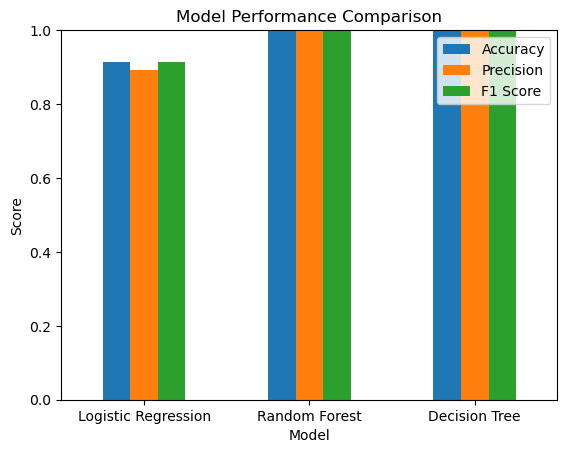

In [1]:

# ## 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

# ## 2. Load and Explore Data
# Load dataset
df = pd.read_csv('pcos_dataset.csv')

# Display first 5 rows
print("Dataset Preview:")
display(df.head())

# Check dataset info
print("\nDataset Info:")
df.info()

# Check class distribution
print("\nClass Distribution:")
print(df['PCOS_Diagnosis'].value_counts())

# ## 3. Data Preprocessing
# Handle missing values (if any)
print("Missing values before handling:")
print(df.isnull().sum())

# Split features and target
X = df.drop('PCOS_Diagnosis', axis=1)
y = df['PCOS_Diagnosis']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Handle class imbalance using SMOTE
print("\nClass distribution before SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# ## 4. Model Training & Evaluation
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = []

# Train and evaluate models using K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Cross-validation
    cv_accuracy = cross_val_score(model, X_train_scaled, y_train_res, cv=kfold, scoring='accuracy')
    cv_precision = cross_val_score(model, X_train_scaled, y_train_res, cv=kfold, scoring='precision')
    cv_f1 = cross_val_score(model, X_train_scaled, y_train_res, cv=kfold, scoring='f1_macro')
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': np.mean(cv_accuracy),
        'Precision': np.mean(cv_precision),
        'F1 Score': np.mean(cv_f1)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# ## 5. Results Comparison
# Display results
print("\nModel Comparison:")
display(results_df)

# Plot performance comparison
plt.figure(figsize=(10, 5))
results_df.set_index('Model').plot(kind='bar', rot=0)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()